<i>Written by: Ahsan Khan, On behalf of Alberta Machine Intelligence Institute for the Al Pathways Partnership supported by Prairies Economic Development Canada</i>

# Lab 3: Regression

In this lab we will be working with three regression models. The type you pick depends on the relationship between the features and the target variables.

In [1]:
#Crucial data processing and analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the modules required to build and evaluate a Regression model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#Loading the boston housing dataset from sklearn
from sklearn.datasets import load_boston

##### Preparing our Data (Boston housing)

In [2]:
boston = load_boston()

# The dependent variable. This is the Median value of owner-occupied homes in $1000's
y = boston.target

#Features
X = boston.data

In [3]:
df = pd.DataFrame(X,columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


##### What the features mean

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Lab Activity One: Linear Regression on One Variable

The linear regression model is best used when there is a **linear** relationship between your features (``X``) and the your target (``Y``). The code cell below prepare the data for you for lab activity one.

In [5]:
from sklearn.linear_model import LinearRegression

# We will only apply linear regression on one of the features. 
#Here we are selecting the 'RM' column (Average number of rooms) from our dataset
X = boston.data[:,5]

# Reshaping the array to be in the proper format. The X array always has to be 2-dimensional as an input into the model along with a one dimensional target(y) array
X = X.reshape(-1,1)

print(X.shape)
print(y.shape)

(506, 1)
(506,)


> [A0] indicates an activity to be answered.

##### [A1] Plot a scatter plot of the Number of Rooms(X) vs the Price(y).

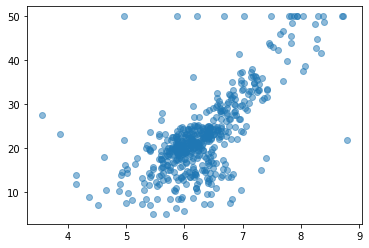

In [6]:
plt.scatter(X, y,alpha=0.5)
plt.show()

##### [A2] Describe the relationship 

There is a visible linear relationship according to the scatter plot

##### [A3] Split your data, Instantiate and Fit a lenear regression model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

##### [A4] Get the intercept and the coefficient of our linear function. Recall ``y = mx + c``, where m is the coefficient and ``c`` is the intercept.

In [8]:
#Intercept (c)
intercept = linear_regression_model.intercept_

#Coefficient (m)
coefficient = linear_regression_model.coef_[0]

print(f'Intercept: {intercept}')
print(f'Coefficients:{coefficient}')

Intercept: -32.57360536882743
Coefficients:8.793220869044909


##### [A5] Plot another scatter plot of your ``X`` and ``y`` data again and this time add a line of best fit (``y = mx +c`` function)

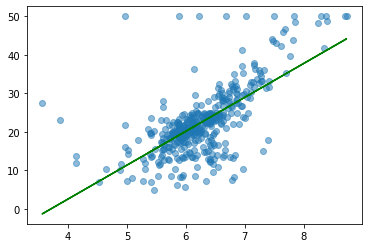

In [9]:
y_function = coefficient*X_train + intercept

plt.scatter(X_train, y_train,  alpha = 0.5)
plt.plot(X_train, y_function, color='green')
plt.show()

##### [A6] Predict on your ``X_test`` data and evaluate your model using the R2 statistic

In [10]:
y_pred = linear_regression_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R2 score', r2_score(y_test,y_pred))
print("RMSE: %f" % (rmse))

R2 score 0.594817553170663
RMSE: 6.598834


## Lab Activity Two: Multilinear Regression

Fitting a linear model on data with more than one feature is called multilinear regression. For this activity you will be fitting a multilinear regression on all of the features of the boston dataset.
The code cell below prepares the data for you

In [11]:
#Target
y_2 = boston.target

#Features
X_2 = boston.data

#Creating The full dataframe
df = pd.DataFrame(X_2,columns = boston.feature_names)
df['Price'] = y_2

df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


##### [A7] Split, instantiate and fit model using all of the features. Remember to use ``X_2`` and ``y_2`` for the train,test split and use different variable names than the ones used in lab activity one.

In [12]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2,test_size=0.2)

linear_regression_model_2 = LinearRegression()
linear_regression_model_2.fit(X_train_2, y_train_2)

LinearRegression()

##### [A8] Predict on your test set you split in this activity and evaluate the model.

In [13]:
y_pred_2 = linear_regression_model_2.predict(X_test_2)


rmse = np.sqrt(mean_squared_error(y_test_2, y_pred_2))
print('R2 score', r2_score(y_test_2,y_pred_2))
print("RMSE: %f" % (rmse))

R2 score 0.7477997547531126
RMSE: 4.483504


## Lab Activity Three: Regression on Non-Linear Data

When performing a regression analysis, you will find the linear regression algorithm is the simplest approach. However, if the data is non-linear it  may call for using a different algorithm. A decision tree regressor does a good for regression problems that contain non-linear data.
- Non-linear Data: there is no linear relationship between the features and the dataset, thus, less likely to fit a 'line-of-best-fit'

##### [A9] Plot a scatter plot of the flowing features listed below vs the target ``y`` (recall y is the price). You can use subplots or 3 different cells for each graph.

- **ZN** : proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** : proportion of non-retail business acres per town
- **RAD** : index of accessibility to radial highways

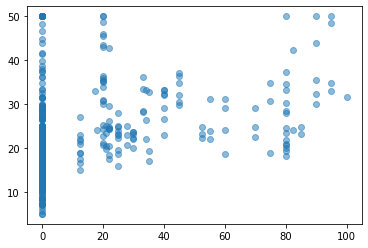

In [14]:
plt.scatter(X_2[:,1], y,alpha=0.5)
plt.show()

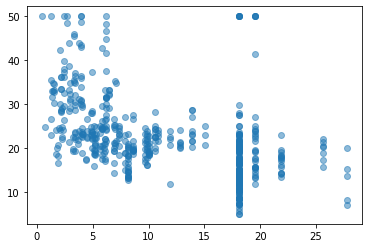

In [15]:
plt.scatter(X_2[:,2], y,alpha=0.5)
plt.show()

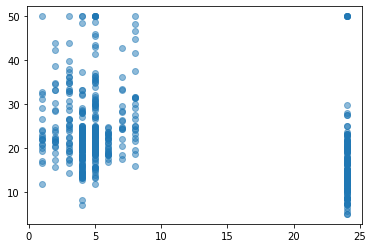

In [16]:
plt.scatter(X_2[:,8], y,alpha=0.5)
plt.show()

You will notice that these features don't have a linear relationship with the price (target). There is non-linearity in the data. This is where a different reggression model will give us better results.

##### [A10] You will now be building a Decision Tree Regressor model. Instantiate and fit the DT regressor using the same training data from lab activity two.

In [17]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train_2, y_train_2)

DecisionTreeRegressor()

##### [A11] Predict on your test data (same test data from activity two) and evaluate your model. Remember to use different variable names where appropriate. 

In [18]:
y_pred_3 = dt_regressor.predict(X_test_2)

rmse = np.sqrt(mean_squared_error(y_test_2, y_pred_3))
print('R2 score', r2_score(y_test_2,y_pred_3))
print("RMSE: %f" % (rmse))

R2 score 0.7554153430345929
RMSE: 4.415292
